# A tricky thing here is the difference between first visits and multiple visits essentially, because the animals have biases 


You could quantify this with a likelihood based approach. This would be the cleanest. You can calculate under.

In effect you don't need them to be making the correct decision at each point, you need them to be more likely to make the correct decision that when they are following a policy that leads them to the correct reward. This could change the results in either direction

You could also quantify this as being between having learned the correct policy and not.

## Analysing it more complicatedly


There are several ways of calculating this. Could compare this to the marginal distribution of all states. Could compare it to the marginal transition matrix.

Ok, so the answer here is complicated. What we therefore need to do is quantify the biases. 

- Quantify stability of biases within session
- Quantify the stability of across session biases
- Quantify these conditional on reward location

My sense is to compare it to the transition matrix distribution calculated for the reward location that preceeded the trial across the entire session


## Unaswered questions

 - What is the null distribution, when you don't directly calculate fraction correct but calculate it against the empirical transition probabilities.
 - What do you do about transitions where in states that were rewarded??
 
 The null hypothesis is that the data
 
 
Really need to think carefully about how to rule out that this is driven by one step transitions

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import functools
import networkx as nx
from datetime import date, timedelta
from datetime import datetime
from statsmodels.stats import proportion
clrs = seaborn.color_palette(n_colors=6)

sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master")
sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master\packages")
sys.path.append("/Users/yves/Documents/Code/line_loop/packages/")

In [3]:
import mouse_poker as mpk

In [4]:
#physical position of the pokes. In terms of numbering, the pokes are numbered as follows
#(or in some cases the indexing starts from 0 rather than 1)

"""
     1
   2   3
 4   5   6 
   7   8
     9
"""

#physical positions of the pokes, used for drawing the graphs
#with nodes and edges. The distances here are to scale with
#the real thing.
poke_pos = [ [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [5]:
from mouse_poker.navi import *

# Tests using simulated agents

In [6]:
diffusion_agent = mpk.simulation.Qlearner()
a = diffusion_agent.run(n_trials=3000)
state_seq = diffusion_agent.state_seq
rew_list = diffusion_agent.rew_list
forced_seq = diffusion_agent.forced_seq

In [7]:
#np.save(open('/Users/yves/Desktop/test_state_seq2.npy','wb'),state_seq)
##np.save(open('/Users/yves/Desktop/test_rew_list2.npy','wb'),rew_list)
#np.save(open('/Users/yves/Desktop/test_forced_seq2.npy','wb'),forced_seq)


(0, 200)

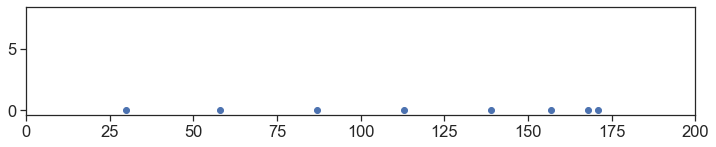

In [8]:
plt.figure(figsize=(12,2))
#plt.plot(state_seq)
plt.scatter(np.where(rew_list)[0],np.array(state_seq)[np.where(rew_list)[0]])
plt.xlim(0,200)

In [9]:

a,_,_,_ = get_transition_matrix(state_seq,rew_list,forced_seq,minNrew=0)

/Users/yves/Documents/Code/line_loop/packages/mouse_poker/navi/navi.py:228: RuntimeWarning: invalid value encountered in true_divide
  for i in range(9)])


In [10]:
np.unique(np.array(state_seq)[np.where(rew_list)[0]])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

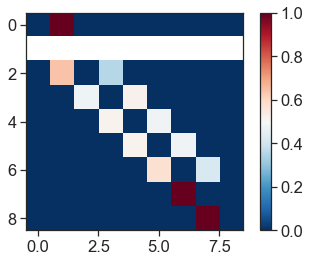

In [11]:
plt.imshow(a[1],cmap='RdBu_r')
plt.colorbar()

In [17]:
state_seq = np.load("/Users/yves/Desktop/test_state_seq.npy")
rew_list = np.load("/Users/yves/Desktop/test_rew_list.npy")
forced_seq = np.load("/Users/yves/Desktop/test_forced_seq.npy")

In [21]:
out = model_based_analysis_single_session(state_seq,rew_list,forced_seq,
                                          ignore_first_visit=True,
                                          ignore_distance=True,
                                          verbose=True,
                                          ignore_has_updated=False,
                                          if_is_rew_loc=True)
perf, trial_ctr, prob_array_for_pois_binom, choices  = out

/Users/yves/Documents/Code/line_loop/packages/mouse_poker/navi/navi.py:228: RuntimeWarning: invalid value encountered in true_divide
  for i in range(9)])


In [22]:
trial_ctr

0

In [26]:
rewarded_pokes = np.where(rew_list)[0]
trial_starts = np.concatenate([[0],rewarded_pokes[:-1]])
trial_ends = rewarded_pokes


In [49]:
mb_ix = 32338

In [50]:
trial_starts[trial_starts<=mb_ix][-10:]

array([32086, 32114, 32142, 32171, 32200, 32230, 32259, 32288, 32313,
       32338])

In [51]:
trial_ends[trial_starts<=mb_ix][-10:]

array([32114, 32142, 32171, 32200, 32230, 32259, 32288, 32313, 32338,
       32363])

In [55]:
state_seq[trial_starts[0]+2]

7

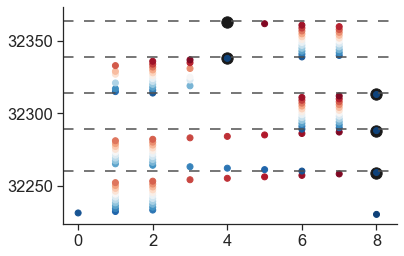

In [61]:
st2 = trial_starts[trial_starts<=mb_ix][-5:]
nd2 = trial_ends[trial_starts<=mb_ix][-5:]
for ix_,(stt,nd) in enumerate(zip(st2,nd2)):
    clrs2 = seaborn.color_palette('RdBu_r',n_colors=nd-stt)
    plt.scatter(state_seq[stt:nd],np.arange(stt,nd),color=clrs2)
    plt.scatter(state_seq[nd],nd,c='k',s=128)
    plt.axhline(y=nd+1,color='.3',dashes=(7,7))
seaborn.despine()

In [42]:
rew_list[nd]

True

In [38]:
np.arange(stt,nd)

array([38009, 38010, 38011, 38012, 38013, 38014, 38015, 38016, 38017,
       38018, 38019, 38020, 38021, 38022, 38023, 38024, 38025, 38026,
       38027, 38028, 38029, 38030, 38031, 38032, 38033])

In [24]:
state_seq[38009:38109]

array([4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 4, 5, 4, 0, 1, 2, 3, 2, 3, 2, 3, 4, 6, 5, 4, 6, 5, 4, 6,
       5, 4, 6, 5, 4, 1, 2, 3, 4, 5, 4, 8, 7, 6, 5, 4, 5, 4, 7, 6, 5, 4,
       3, 4, 0, 1, 2, 3, 4, 7, 6, 5, 4, 8, 7, 6, 5, 4, 6, 5, 4, 8, 7, 6,
       5, 4, 2, 3, 4, 0, 1, 2, 3, 4, 5, 4])

In [ ]:
ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_4_RUNNAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]



ign_d = True
ignore_first_visit = True
res_= model_based_batch(allFs,
                        ignore_distance=ign_d,
                        ignore_first_visit=ign_f,
                        ignore_prev_rew_loc_in_seq=True)
perf, trial_ctr, prob_array_for_pois_binom, choices  = res_

In [19]:
ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_4_RUNNAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]



ign_d = True
ignore_first_visit = True
res_= model_based_batch(allFs,
                        ignore_distance=False,
                        ignore_first_visit=False,
                        ignore_prev_rew_loc_in_seq=True,
                        verbose=True)
perf, trial_ctr, prob_array_for_pois_binom, choices  = res_

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

direction:True,exp_dirs:[False]
sapp:False
prev_rew_loc_in_seq:True
state:2,nextstate:3,rew_loc:5,prev_rew_loc:1,correct:1,prev_tp:0.04
[0, 1, 2, 3, 2, 1, 2, 3, 2, 3, 4, 5] 1297


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

direction:True,exp_dirs:[False]
sapp:False
prev_rew_loc_in_seq:True
state:3,nextstate:2,rew_loc:5,prev_rew_loc:1,correct:0,prev_tp:0.07
[0, 1, 2, 3, 2, 1, 2, 3, 2, 3, 4, 5] 1297


8 0 False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [15]:
#181,460,976,1003,1226,540,767,149,528,1793,909,1572,

In [16]:
perf

24

In [17]:
trial_ctr

48

In [ ]:
np.sum(choices)

In [ ]:
trial_ctr

In [ ]:
pbd.x_or_more(np.sum(choices))

# Batch Version 

Checks that I have run on this code:

- Ensure that distances between states within a trial is always equal to 1

# Run on first block version 

# Over parameter versions

In [ ]:
all_Fs_sets = []

ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_4_RUNNAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
all_Fs_sets.append(allFs)


ROOT = '/Users/yves/Documents/behavior_data/line_loop_cohort_1/line_loop_batch_4_RUNNAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
#all_Fs_sets[0].extend(allFs)
all_Fs_sets.append(allFs)


ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
allFs = [i for i in allFs if '456675' in i]

all_Fs_sets.append(allFs)

ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
allFs = [i for i in allFs if '460175' in i]

all_Fs_sets.append(allFs)

ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_males/'
allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
allFs = [i for i in allFs if not os.path.isdir(i)]
allFs = [i for i in allFs if '456674_30' in i]
all_Fs_sets.append(allFs)



#ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_males/'
#allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
#allFs = [i for i in allFs if not os.path.isdir(i)]
#allFs = [i for i in allFs if '456674_1' in i]
#all_Fs_sets.append(allFs)

#subjects = ['456675_3\nround1','456675_3\nround2','456675_10','460175_10']
subjects = ['456675_3','2','456675_10','460175_10','456674_30']


In [ ]:
#ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_3NAVI_males/'
#allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
#allFs = [i for i in allFs if not os.path.isdir(i)]
#allFs

In [ ]:
#ROOT = '/Users/yves/Documents/beh_dat_new_room/line_loop_batch_4_RUNNAVI/'
#allFs = [os.path.join(ROOT,i) for i in os.listdir(ROOT)]
#allFs = [i for i in allFs if not os.path.isdir(i)]


In [ ]:
#This should produce 1 correct choice
state_seq =  np.array([0,1,2,8,7,6,5,3,4,5])
rew_list =   np.array([0,0,1,0,0,0,1,0,0,1])
forced_seq = np.array([1,0,0,1,0,0,0,0,0,0])==1

In [ ]:
#This should produce 1 incorrect choice
state_seq =  np.array([0,1,2,8,7,6,5,3,2,1,2,3,4,5])
rew_list =   np.array([0,0,1,0,0,0,1,0,0,0,0,0,0,1])
forced_seq = np.array([1,0,0,1,0,0,0,0,0,0,0,0,0,1])==1

In [ ]:
#This should produce 1 incorrect and one correct choice
state_seq =  np.array([0,1,2,8,7,6,5,3,2,1,2,3,4,5,8,7,6,7])
rew_list =   np.array([0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1])
forced_seq = np.array([1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0])==1

In [ ]:
from mouse_poker.navi.navi_utils import *

In [ ]:
out = model_based_analysis_single_session(state_seq,rew_list,forced_seq,verbose=True,minNrew=0,
                                          ignore_distance=True,ignore_first_visit=True,ignore_has_updated=False)
perf, trial_ctr, prob_array_for_pois_binom, choices = out

In [ ]:
perf

In [ ]:
trial_ctr

In [ ]:
def model_based_analysis_single_session(state_seq,rew_list,forced_seq,
                                        ignore_distance=False,ignore_first_visit=False,
                                        ignore_has_updated=True,
                                        minNrew=15,use_block_transitions=False,verbose=False,):
    """ Check for model based behaviour on trials"""


    #define variables that will be output
    prob_array_for_pois_binom = []
    choices = []
    perf = 0
    trial_ctr = 0

    transition_mtx,_,_,_= get_transition_matrix(state_seq,
                                                rew_list,
                                                forced_seq,
                                                minNrew=minNrew)



    #organise data into trials
    rewarded_pokes = np.where(rew_list)[0]
    trial_starts = np.concatenate([[0],rewarded_pokes[:-1]])
    trial_ends = rewarded_pokes


    #initialise variables
    prev_rew_loc = None  #this is the reward location that was last updated
    direction = None
    has_updated = False
    same_as_prev_pol = True
    exp_dirs = []
    prev_block_start = 0
    block_start = 0
    check1 = []
    for st,nd in zip(trial_starts,trial_ends):

        rew_loc = state_seq[nd]  #this is state that is rewarded

        prev_direction = direction

        if rew_loc!=prev_rew_loc:
            #print("HERE")
            direction = None
            has_updated = False
            prev_direction = None
            exp_dirs = [] #experienced directions
            prev_diff_rew_loc = prev_rew_loc
            visited_states = []
            prev_block_start = block_start
            block_start = st


        direction = (rew_loc - state_seq[st+1])>0 #which side are you approaching the reward from
        visited_states = []


        for pk_ctr in range(st+1,nd):  #for each poke between two rewards  

            d0,d1,_ = get_st_dist(state_seq,pk_ctr,rew_loc)
            free_choice_trial = forced_seq[pk_ctr]==False
            state = state_seq[pk_ctr]
            next_state = state_seq[pk_ctr+1]
            same_as_prev_pol = policy_changed_with_rew_loc(pk_ctr,state_seq,rew_loc,prev_diff_rew_loc)
            check1.append(np.abs(state-next_state))
            inclusion_condition_list = [free_choice_trial,              #NOT a forced trial
                                     prev_diff_rew_loc is not None,  #ignore first block in session
                                     not same_as_prev_pol,           #ensure that this a policy change is required to make correct decision
                                     prev_direction is not None,     #make sure NOT looking at first run-to-rew after a block transition (when rew_loc is unknown)
                                     direction not in exp_dirs,      #hasn't experienced this direction in this block yet
                                     (ignore_has_updated or (not has_updated)),               #toggle if only look at first relevant POKE in block
                                     (ignore_first_visit or (state not in visited_states)),    #look only at first visits to each state
                                     (ignore_distance or (d0>1)),
                                     state!=rew_loc,  #this is necessary due to a bug in the code
                                     ]
            print([state]+inclusion_condition_list)
            
            if all(inclusion_condition_list):
                
                if use_block_transitions:
                    
                    transition_mtx,_,_,_= get_transition_matrix(state_seq[prev_block_start:block_start],
                                                                rew_list[prev_block_start:block_start],
                                                                forced_seq[prev_block_start:block_start],
                                                                minNrew=minNrew)

                    
                choice_correct = int(d1<d0)
                perf += choice_correct
                trial_ctr += 1
                t_p = transition_mtx[prev_diff_rew_loc,state,next_state]
                
                #because we are counting the sum of correct choices, need to look at probability of correct choice
                #under previous model, not of empirical transition
                if not choice_correct:
                    t_p = 1-t_p
                
                #only include
                if not np.isnan(t_p):
                    prob_array_for_pois_binom.append(t_p)
                    choices.append(int(d1<d0))

                #this is print command to make sure everything is working correctyl.
                if verbose:
                    print(("!"*80 + "\n")*3)
                    print_list = (state,state_seq[pk_ctr+1],rew_loc,prev_diff_rew_loc,choice_correct,np.round(t_p,decimals=2))
                    print('state:{},nextstate:{},rew_loc:{},prev_rew_loc:{},correct:{},prev_tp:{}'.format(*print_list))
                    #print(pk_ctr,os.path.split(fpath)[-1])
                    print(state_seq[st+1:nd+1])
                    print('\n')

                has_updated = True  #if decisions from this block have led to updated

            visited_states.append(state)

        if direction not in exp_dirs:
            exp_dirs.append(direction)
        prev_rew_loc = rew_loc
        assert all(np.asarray(check1)==1)
    return perf, trial_ctr, prob_array_for_pois_binom, choices

In [ ]:
model_based_analysis_single_session(state_seq,rew_list,forced_seq,verbose=True,minNrew=0,)

In [ ]:
state_seq

In [ ]:
res_= model_based_batch(allFs,ignore_distance=True,ignore_first_visit=True,use_block_transitions=True,
                            ignore_has_updated=False,min_rew_in_session=0,verbose=1)


In [ ]:
res_

## Analyse after first block

In [ ]:
all_param_res = []
for ign_d,ign_f in param_combos:
    allres = []

    for allFs in all_Fs_sets:
        res_= model_based_batch(allFs,ignore_distance=ign_d,ignore_first_visit=ign_f,use_block_transitions=True,
                                    ignore_has_updated=False,min_rew_in_session=100)
        perf, trial_ctr, prob_array_for_pois_binom, choices  = res_
        pbd = PoissonBinomial(prob_array_for_pois_binom)
        pval = np.abs(pbd.x_or_more(np.sum(choices)))
        print(pval,perf,trial_ctr)

        allres.append([perf/trial_ctr,perf,trial_ctr,pval,np.mean(prob_array_for_pois_binom),ign_d==False,ign_f==False])
    all_param_res.append(allres)

In [ ]:
[i[0][:2] for i in all_param_res]

In [ ]:
plt.figure(figsize=(14,10))
plt.suptitle("Model based choices after block switch\nStars = 0.05/p-value based on Poisson-Binomial distribution")
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Only Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0]-i[4] for i in allres])
    #ci = np.array([np.array(proportion.proportion_confint(i[1],i[2])) for i in allres])
    print([i[3] for i in allres])
    for subj_ix in range(len(subjects)):
        #plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix-.1,0.01),size=20)
        pvalue_pbd = allres[subj_ix][3]
        if pvalue_pbd<0.05:
            print_text = '*'*int(np.clip(np.floor(0.05/pvalue_pbd),0,4))
            plt.gca().annotate(print_text,(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')
        else:
            plt.gca().annotate(':(',(subj_ix,np.clip(mu[subj_ix]+.01,.3,.6)),size=36, ha='center')



    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(np.arange(len(subjects)),mu,facecolor='w',edgecolor='k',linewidth=3,width=.8,label="$FC - \mathbb{E}(FC)_{prev \ block}$")
    plt.bar(np.arange(len(subjects))-.4,[i[0] for i in allres],facecolor=clrs[2],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='FC')
    plt.bar(np.arange(len(subjects)),[i[4] for i in allres],facecolor=clrs[3],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='$\mathbb{E}(FC)_{prev \ block}$')

    if kk==0:
        plt.legend()

    plt.ylim(0,.9)
    #plt.ylim()
    #plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("$FC - \mathbb{E}(FC)_{prev \ block}$")
        plt.xlabel("Subject")
    plt.xticks(range(4),subjects)
    #plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
seaborn.despine()

In [ ]:
plt.figure(figsize=(14,10))
plt.suptitle("Model based choices after block switch\n\n")
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Only Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0]-i[4] for i in allres])
    #ci = np.array([np.array(proportion.proportion_confint(i[1],i[2])) for i in allres])
    print([i[3] for i in allres])
    for subj_ix in range(len(subjects)):
        #plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix-.1,0.01))
        pvalue_pbd = allres[subj_ix][3]
        if pvalue_pbd<0.05:
            print_text = '*'*int(np.clip(np.floor(0.05/pvalue_pbd),0,4))
            plt.gca().annotate(print_text,(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')
        else:
            plt.gca().annotate(':(',(subj_ix,np.clip(mu[subj_ix]+.01,0,.6)),size=36, ha='center')



    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(np.arange(len(subjects)),mu,facecolor='w',edgecolor='k',linewidth=3,width=.8)
    plt.bar(np.arange(len(subjects))-.4,[i[0] for i in allres],facecolor=clrs[2],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='FC')
    plt.bar(np.arange(len(subjects)),[i[4] for i in allres],facecolor=clrs[3],
            edgecolor='k',linewidth=0,width=.4,alpha=.2,align='edge',label='$\mathbb{E}(FC)_{prev \ block}$')

    if kk==0:
        plt.legend()

    plt.ylim(0,.9)
    #plt.ylim()
    #plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("$FC - \mathbb{E}(FC)_{prev \ block}$")
        plt.xlabel("Subject")
    plt.xticks(range(4),subjects)
    #plt.yscale('log')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
seaborn.despine()

In [ ]:
5/8

In [ ]:
stt.binom_test(5,8,p=.2)

In [ ]:
plt.figure(figsize=(18,12))
plt.suptitle("First block model based choices")
for kk,allres in enumerate(all_param_res):
    
    plt.subplot(2,2,kk+1)
    plt.title("Choices >1 step away:{}\nOnly first state visit:{}".format(allres[0][-2],allres[0][-1]))

    mu = np.array([i[0] for i in allres])
    ci = np.array([np.array(proportion.proportion_confint(i[1],i[2])) for i in allres])

    for subj_ix in range(len(subjects)):
        plt.plot([subj_ix]*2,ci[subj_ix],color='k',linewidth=3,zorder=100)
        plt.gca().annotate(str(allres[subj_ix][2]),(subj_ix+.1,allres[subj_ix][0]+.05))

    #plt.errorbar(range(4),mu,yerr=(mu[:,None]+ci).T,color='k',linewidth=0,elinewidth=3)
    plt.bar(range(4 ),[i[0] for i in allres],facecolor='w',edgecolor='k',linewidth=3,width=.85)
    plt.ylim(.2)
    plt.axhline(y=0.5,dashes=(8,8),color='.3',linewidth=2)
    if kk==0:
        plt.ylabel("Proportion correct")
        plt.xlabel("Subject")
    plt.xticks(range(4),subjects)
plt.tight_layout()
seaborn.despine()

In [ ]:
allres[]